<h2 align="center">News classification using Spacy word vectors</h2>

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
#importing Large model
nlp = spacy.load("en_core_web_lg")

In [19]:

df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [20]:
df.shape

(9900, 2)

In [21]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [22]:
value_counts = pd.Series(df.label.value_counts())
value_counts

label
Fake    5000
Real    4900
Name: count, dtype: int64

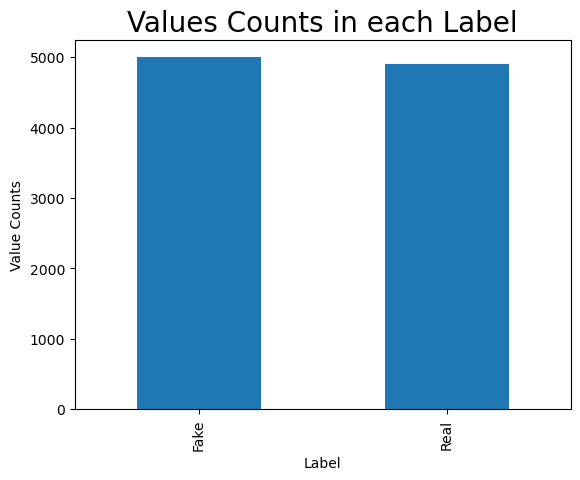

In [23]:
value_counts.plot(kind="bar",  fontsize = 10.00)
plt.xlabel("Label", fontsize=10)
plt.ylabel("Value Counts", fontsize=10)
plt.title("Values Counts in each Label", fontsize=20 )
plt.show()

Data is balanced

In [24]:
df["label"] = df.label.replace({"Fake":0, "Real":1})
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


<h2>Convert Text to Vec</h2>

In [25]:
df["vector"] = df.Text.apply(lambda x: nlp(x).vector)

In [26]:
df.head()

,Text,label,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


In [28]:
x_train, x_test, y_train, y_test = train_test_split(df.vector.values, df.label, random_state=52, test_size=0.2, stratify=df.label)

In [30]:
x_train.shape

(7920,)

In [31]:
x_test.shape

(1980,)

In [32]:
y_train.shape

(7920,)

In [33]:
#value counts

print(y_train.value_counts())

label
0    4000
1    3920
Name: count, dtype: int64


In [34]:
print(y_test.value_counts())

label
0    1000
1     980
Name: count, dtype: int64


In [35]:
#convert 3d array to 2d array  using numpy stack function

x_train_stacked = np.stack(x_train)
x_test_stacked = np.stack(x_test)

In [36]:
x_train_stacked

array([[-1.9382643 ,  0.7654761 , -1.5717806 , ..., -1.0347748 ,
        -2.3326223 ,  0.8360284 ],
       [-1.278009  ,  1.0461403 , -2.284305  , ..., -0.41788658,
        -3.0162644 ,  0.7691732 ],
       [-1.8689204 ,  0.94796807, -2.0459638 , ..., -0.59868026,
        -1.7566115 ,  0.89236635],
       ...,
       [-1.751842  ,  1.1814615 , -1.6754082 , ..., -0.47716755,
        -2.2842975 ,  0.7332528 ],
       [-1.9503833 ,  0.3544158 , -1.7429268 , ..., -0.8536603 ,
        -1.6983602 ,  0.7185569 ],
       [-1.4780033 ,  0.6286457 , -2.0531907 , ..., -0.52818173,
        -2.7071853 ,  0.9743391 ]], dtype=float32)

In [37]:
# multinomial

clf = MultinomialNB()
clf.fit(x_train_stacked, y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

got error bcz this algo not give results for negetive values

so let's apply normalization using min-max scaling

In [38]:
scaler = MinMaxScaler()
x_train_stacked_scaled= scaler.fit_transform(x_train_stacked, y_train)
x_test_stacked_scaled = scaler.transform(x_test_stacked)


clf = MultinomialNB()
clf.fit(x_train_stacked_scaled, y_train)

MultinomialNB()

In [40]:
y_pred = clf.predict(x_test_stacked_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95       980

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [42]:
# using KNN

knn_model = KNeighborsClassifier(n_neighbors=5, metric="euclidean")

knn_model.fit(x_train_stacked_scaled, y_train)

y_pred = knn_model.predict(x_test_stacked_scaled)

print("Classification Report of KNN Model:\n", classification_report(y_test, y_pred))

Classification Report of KNN Model:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1000
           1       0.99      1.00      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980

